In [1]:
# PROJET WALMART

In [ ]:
#Install plotly
!pip install plotly

In [2]:
#Import librairies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

In [4]:
# Import dataset

In [5]:
dataset=pd.read_csv('Walmart_Store_sales.csv')

In [6]:
# Information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [7]:
# Statistic description
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


In [8]:
# Detect missing values
print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [9]:
# Dataset shape (rows:150 and columns:8)
dataset.shape

(150, 8)

In [10]:
dataset['Date'].value_counts()

07-01-2011    4
19-10-2012    4
25-03-2011    3
12-11-2010    3
10-12-2010    3
             ..
13-01-2012    1
26-11-2010    1
05-08-2011    1
26-02-2010    1
11-06-2010    1
Name: Date, Length: 85, dtype: int64

In [11]:
# Data Visualization

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

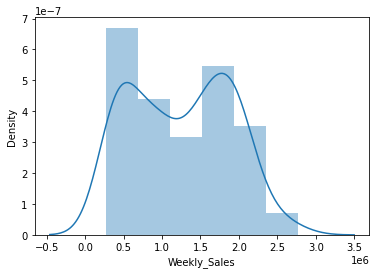

In [12]:
sns.distplot(dataset['Weekly_Sales'])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

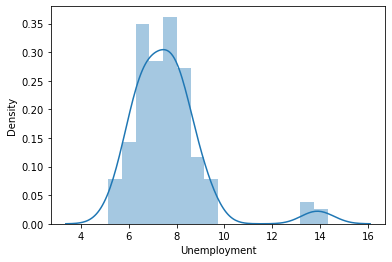

In [13]:
sns.distplot(dataset['Unemployment'])

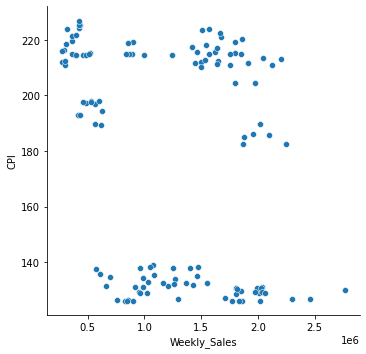

In [14]:
sns.relplot(x = 'Weekly_Sales' , y = 'CPI' , data = dataset)

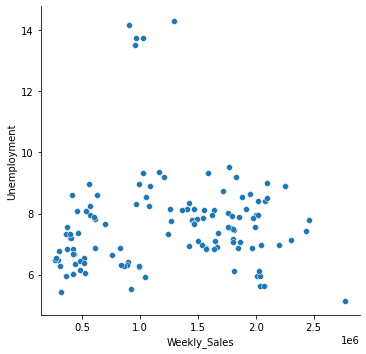

In [15]:
sns.relplot(x = 'Weekly_Sales' , y = 'Unemployment' , data = dataset)

In [16]:
# Data Préprocessing
# target: Weekly Sales
# Remove missing values of "Weekly Sales" column
# Remove "Date" column
# Remove outliers mean +/- 3 *ecart-type:Température , Fuel_price , CPI et Unemployment 

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [18]:
dataset = dataset.loc[dataset['Weekly_Sales'].notnull(), :]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         136 non-null    float64
 1   Date          118 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  125 non-null    float64
 4   Temperature   121 non-null    float64
 5   Fuel_Price    124 non-null    float64
 6   CPI           125 non-null    float64
 7   Unemployment  122 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [19]:
dataset = dataset.drop(['Date'],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         136 non-null    float64
 1   Weekly_Sales  136 non-null    float64
 2   Holiday_Flag  125 non-null    float64
 3   Temperature   121 non-null    float64
 4   Fuel_Price    124 non-null    float64
 5   CPI           125 non-null    float64
 6   Unemployment  122 non-null    float64
dtypes: float64(7)
memory usage: 8.5 KB


In [20]:
# create a function to remove outliers
def outliers(df, col_name):
    
    variable = (df[col_name].isnull()) | ((df[col_name] < df[col_name].mean() + 3 * df[col_name].std()) & 
               (df[col_name] > df[col_name].mean() - 3 * df[col_name].std()))
    df = df.loc[variable,:]
    return df

#iteration on columns and call the function outliers in order to remove outliers
for c in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    dataset = outliers(dataset, c)
    
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         131 non-null    float64
 1   Weekly_Sales  131 non-null    float64
 2   Holiday_Flag  120 non-null    float64
 3   Temperature   117 non-null    float64
 4   Fuel_Price    119 non-null    float64
 5   CPI           120 non-null    float64
 6   Unemployment  117 non-null    float64
dtypes: float64(7)
memory usage: 8.2 KB


In [21]:
# Categorical features: Store, Holiday_Flag 
# Numeric features: Température, Fuel_Price, CPI, Unmeployment

In [22]:
# Setting up the multivariable linear regression model

In [23]:
features=["Temperature","Fuel_Price","CPI","Unemployment",'Store','Holiday_Flag']
target = "Weekly_Sales"

In [24]:
# Mise en place de la variable explicative X et de la variable cible y
X = dataset.loc[:, features]
y = dataset.loc[:, target]

In [25]:
display(100*X.isnull().sum()/X.shape[0])

Temperature     10.687023
Fuel_Price       9.160305
CPI              8.396947
Unemployment    10.687023
Store            0.000000
Holiday_Flag     8.396947
dtype: float64

In [26]:
# Split the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
display(X.shape)

(131, 6)

In [27]:
print(X_train.columns)
print(X_test.columns)

Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store',
       'Holiday_Flag'],
      dtype='object')
Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store',
       'Holiday_Flag'],
      dtype='object')


In [28]:
# Categorical features are Store and Holiday_Flag with index 4 et 5 respectively
# Numeric features are Temperature, Fuel_Price, CPI, Unemployment with index 0,1,2,3 respectively

numeric_features = [0,1,2,3]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = [4,5] 
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [29]:
# Preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [30]:
# Create the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [31]:
#Predictions with the train set
y_train_pred = regressor.predict(X_train)
y_train_pred

array([2160430.7869404 , 1538815.96878469, 1234788.30951085,
       1275666.37566318,  284305.64467224,  918142.53024421,
       2028812.64342767, 2104483.56450457,  513747.80850664,
       2034930.246683  , 1417145.33129763,  437081.19840833,
       1992667.02350065, 1555721.49870492, 1424476.86757575,
       1995128.85650834, 2078117.73886315, 2081721.06064366,
       1650518.98845242, 1950772.5380825 , 2052341.39357092,
       1803215.73557225, 2008308.21280703,  578936.46822311,
       1524293.52166375,  577721.49805581, 1501024.66924274,
        501302.54262031,  496941.47246125, 2068672.76119421,
       1359754.99616617,  938248.48354343, 1972435.6342871 ,
       2069191.67207759, 1253900.88952089, 1980604.63650611,
       1937308.64308847, 1027194.54056585,  517862.69046126,
        341607.29208816, 2114221.25847197, 1914617.50939392,
       1554252.59482497,  593086.47160807, 1606645.02392363,
       1476613.17407872,  225892.28284398, 1575321.35205674,
       2133285.7897755 ,

In [32]:
#Prédiction with the test set
y_test_pred = regressor.predict(X_test)
y_test_pred

array([ 402493.95950293,  475883.95788981, 1079929.00013058,
        974573.45456264,  325754.13042702, 1899511.60293612,
       1443265.61263123, 1086862.76563989, 1145529.75634761,
        952282.30125646, 1846615.91316444, 2208986.11450397,
       1331408.97159359,  692647.46944131, 1170982.14062561,
        424369.84313543, 2199448.81714691,  402892.22780318,
       1597840.99502112, 1933846.76163879,  971408.11327394,
        378589.60896966,  376532.52841208, 1967620.28873527,
       1940565.89381459, 1611238.25740259,  232609.3817815 ])

In [33]:
# Print R2 scores
from sklearn.metrics import r2_score
print("R2 score on training set:", r2_score(y_train, y_train_pred))
print("R2 score on test set:", r2_score(y_test, y_test_pred))

R2 score on training set: 0.9629121558724477
R2 score on test set: 0.9390204014809227


In [34]:
# Using RIDGE

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [36]:
ridge = Ridge()
ridge.fit(X_train, y_train)


Ridge()

In [37]:
y_train_pred = ridge.predict(X_train)

In [38]:
Y_test_pred = ridge.predict(X_test)

In [39]:
# R2 display

In [40]:
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))

R2 score on training set :  0.9269635323570826
R2 score on test set :  0.90088678613981


In [41]:
# Hyperparameters optimization with GridSearchCV

In [43]:
# Optimization of the "alpha" hyperparameter in the range 0 to 1000 with a step of 1
params = {'alpha': np.arange(0, 1000, 1)}

In [44]:
# Call the model
ridge = Ridge()

In [45]:
# Fitting the model by using GridSearchCV
ridgeCV = GridSearchCV(ridge, params, cv=5, verbose = 1)
ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   16.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,...
       910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922,
       923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935,
       936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
       949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974,
       975, 97

In [46]:
# Prediction with train set
Y_train_pred = ridgeCV.predict(X_train)

In [47]:
#Prediction with test set
Y_test_pred = ridgeCV.predict(X_test)

In [48]:
# R2 display
print("R2 score on training set : ", r2_score(y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))

R2 score on training set :  0.9629104965136265
R2 score on test set :  0.9390549070787984
